In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.cluster import KMeans

In [2]:
data = pickle.load(open('data_without_cluster.pickle',mode='rb'))

In [3]:
def month_year(x, y):
    result_array = np.array([[str(i), x, y] for i in range(1, 31)])
    result_array_reshaped = result_array.reshape(-1, 3)
    return result_array_reshaped

In [4]:
data["TOTAL OUT FLOW (MCM)"].values

array([0.   , 0.   , 0.   , ..., 4.665, 4.408, 7.779])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.

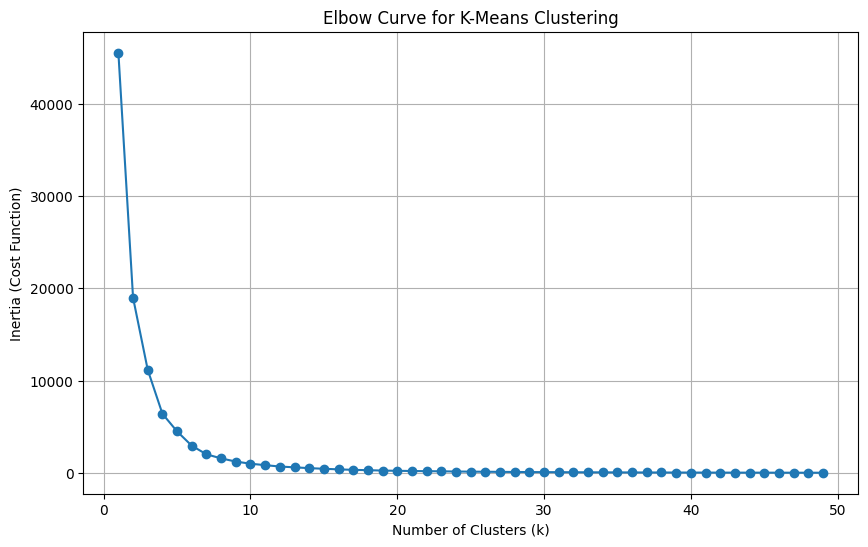

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming data and X are already defined as in your previous code

# Define a range of k values
k_values = range(1, 50)  # You can adjust the range as needed

# Initialize an empty list to store inertia values
inertia_values = []

# Iterate through different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data["TOTAL OUT FLOW (MCM)"].values.reshape(-1, 1))
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Cost Function)')
plt.grid(True)
plt.show()


### Therefore k should be 6

In [6]:
X = data['Spillway Discharge'].values.reshape(-1, 1)

# Choose the number of clusters (k)
k = 12
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
data

,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS,Day,Month,Year,Cluster
0,438.09,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,29,12,2014,0
1,438.02,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,30,12,2014,0
2,438.00,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,31,12,2014,0
3,438.01,722.0,34.0,9.76,0.0,0.000,21.630,0.000,0,430.0,0.0,0,1,1,2015,4
4,437.98,722.0,34.0,6.06,0.0,0.000,17.210,0.000,0,430.0,0.0,0,2,1,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,417.84,722.0,34.0,0.00,0.0,0.057,6.698,1.758,15.3,484.0,0.0,0,2,4,2023,0
3017,417.48,722.0,34.0,0.00,0.0,0.057,7.006,1.506,0.9,485.0,0.0,0,3,4,2023,0
3018,417.08,722.0,34.0,0.00,0.0,0.057,4.665,2.375,14.5,486.0,0.0,0,4,4,2023,0
3019,416.91,722.0,34.0,0.00,0.0,0.057,4.408,1.578,0,487.0,0.0,0,5,4,2023,0


In [8]:
pickle.dump(data,open('preprocessed_data.pickle','wb'))

In [9]:
X = data[['Day', 'Month', 'Year']]
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9859154929577465
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0

    accuracy                           0.99       497
   macro avg       0.14      0.14      0.14       497
weighted avg       0.99      0.99      0.99       497



c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [20]:
month_data = month_year(month_value, year_value)
prediction = clf.predict(month_data)
            
tolerance = 1e-6  # You can adjust this based on your specific case
            
if prediction is not None and np.any(np.abs(prediction) > tolerance):
    prediction_result = "open"
else:
    prediction_result = "close"

NameError: name 'month_value' is not defined

In [12]:
class PredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Prediction App")

        # Create and set up widgets
        self.label_month = ttk.Label(master, text="Month:")
        self.entry_month = ttk.Entry(master)
        self.label_year = ttk.Label(master, text="Year:")
        self.entry_year = ttk.Entry(master)
        self.predict_button = ttk.Button(master, text="Predict", command=self.make_prediction)

        # Layout
        self.label_month.grid(row=0, column=0, padx=10, pady=10)
        self.entry_month.grid(row=0, column=1, padx=10, pady=10)
        self.label_year.grid(row=1, column=0, padx=10, pady=10)
        self.entry_year.grid(row=1, column=1, padx=10, pady=10)
        self.predict_button.grid(row=2, column=0, columnspan=2, pady=10)

    def make_prediction(self):
        try:
            month_value = int(self.entry_month.get())
            year_value = int(self.entry_year.get())
        except ValueError:
            messagebox.showerror("Error", "Please enter valid numeric values for Month and Year.")
            return

        month_data = month_year(month_value, year_value)

        try:
            prediction = clf.predict(month_data)
            
            tolerance = 1e-6  # You can adjust this based on your specific case
            
            if prediction is not None and np.any(np.abs(prediction) > tolerance):
                prediction_result = "open"
            else:
                prediction_result = "close"
            messagebox.showinfo("Prediction", f"The spillway will {prediction_result}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurre {str(e)}")

if __name__ == "__main__":
    # Create and train your model (Assuming data is defined)
    X = data[['Day', 'Month', 'Year']]
    y = data['Cluster']
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Create the main application window
    root = tk.Tk()
    app = PredictionApp(root)
    root.mainloop()


KeyError: 'Cluster'